# Global Maps

This script generates Figure 5, Figure 6, Figure 7, Figure S1, and Figure S2

In [1]:
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1 import AxesGrid

## Figure 5 (chi_abd)

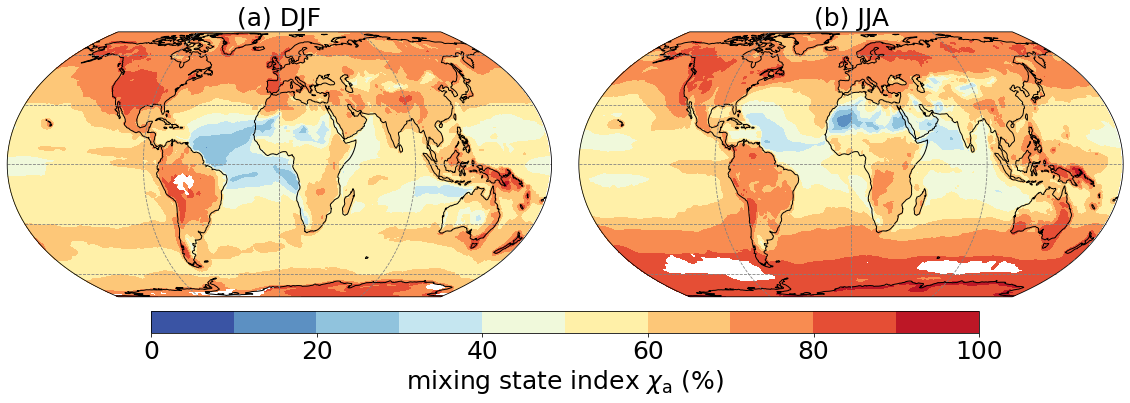

In [2]:
ds = xr.open_dataset("../nc_files/f09_mask.nc")
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))
ds=ds.rename_dims({'lon': 'longitude','lat': 'latitude'}).rename({'lon': 'longitude','lat': 'latitude'})
lons=np.asarray(ds.longitude)
lats=np.asarray(ds.latitude)
xx, yy = np.meshgrid(lons, lats)

DJF=np.asarray(ds["chi_abd"].sel(season="DJF"))
JJA=np.asarray(ds["chi_abd"].sel(season="JJA"))

rc={'axes.labelsize':25, 'font.size':25 , 'legend.fontsize':25, 'axes.titlesize':25}
plt.rcParams.update(**rc)


crs = ccrs.EqualEarth()
projection =ccrs.PlateCarree()
levels = [0,10,20,30,40,50,60,70,80,90,100]

fig = plt.figure(figsize=(20, 10))
spec2 = matplotlib.gridspec.GridSpec(ncols=2, nrows=1, figure=fig,
                                     wspace=.05, hspace=.55,
                                     bottom=.05, top=.95)

axes = []
f0 = fig.add_subplot(spec2[0, 0],projection=crs)
f1 = fig.add_subplot(spec2[0, 1],projection=crs)
axes.append([f0,f1])

################ first row ################ 
ax= plt.subplot(axes[0][0],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(a) DJF')
p0 = ax.contourf(xx, yy, DJF,
                 vmin=0,vmax=100,
                 transform=projection,
                 levels=levels,
                 cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

ax= plt.subplot(axes[0][1],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(b) JJA')
p1 = ax.contourf(xx, yy, JJA,
                 vmin=0,vmax=100,
                 transform=projection,
                 levels=levels,
                 cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

    
    
pos2 = axes[0][1].get_position()
pos1 = axes[0][0].get_position()
cbar_ax = fig.add_axes([pos1.x0+0.1,pos1.y0-.05,
                        pos2.x1-pos1.x0-0.2,.03])
cbar_ax.xaxis.set_label_position('bottom')
cbar = fig.colorbar(p1,cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel(r'mixing state index $\chi_{\rm{a}}$ (%)')


plt.savefig('../../figures/chi_abd.pdf')
plt.show()

## Figure 6 (chi_opt1)

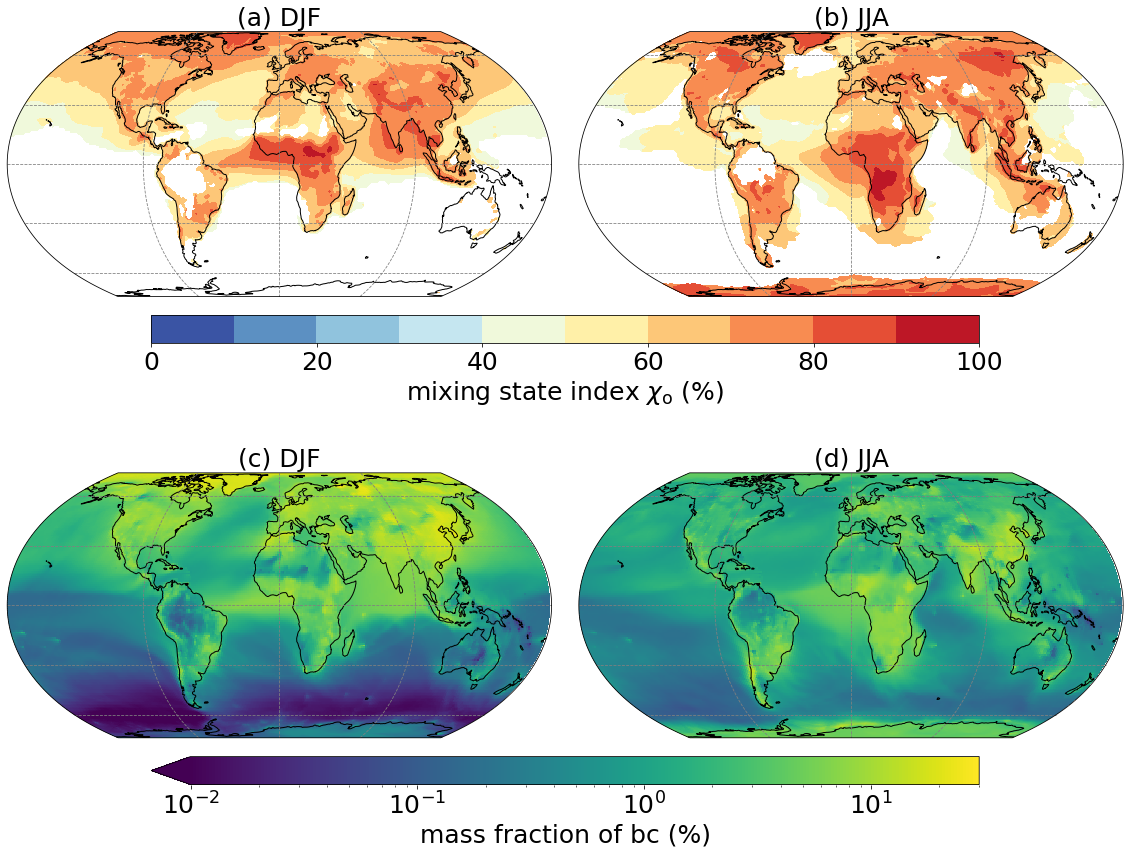

In [3]:
ds = xr.open_dataset("../nc_files/f09_mask.nc")
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))
ds=ds.rename_dims({'lon': 'longitude','lat': 'latitude'}).rename({'lon': 'longitude','lat': 'latitude'})
lons=np.asarray(ds.longitude)
lats=np.asarray(ds.latitude)
xx, yy = np.meshgrid(lons, lats)

DJF=np.asarray(ds["chi_opt1"].sel(season="DJF"))
JJA=np.asarray(ds["chi_opt1"].sel(season="JJA"))
DJF_per = np.asarray(ds["opt1_per"].sel(season="DJF")*100)
JJA_per = np.asarray(ds["opt1_per"].sel(season="JJA")*100)

rc={'axes.labelsize':25, 'font.size':25 , 'legend.fontsize':25, 'axes.titlesize':25}
plt.rcParams.update(**rc)


crs = ccrs.EqualEarth()
projection =ccrs.PlateCarree()
levels = [0,10,20,30,40,50,60,70,80,90,100]

fig = plt.figure(figsize=(20, 13))
spec2 = matplotlib.gridspec.GridSpec(ncols=2, nrows=2, figure=fig,
                                     wspace=.05, hspace=.1,
                                     bottom=.05, top=.95)

axes = []
f0 = fig.add_subplot(spec2[0, 0],projection=crs)
f1 = fig.add_subplot(spec2[0, 1],projection=crs)
axes.append([f0,f1])

f0 = fig.add_subplot(spec2[1, 0],projection=crs)
f1 = fig.add_subplot(spec2[1, 1],projection=crs)
axes.append([f0,f1])

################ first row ################ 
ax= plt.subplot(axes[0][0],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(a) DJF')
p0 = ax.contourf(xx, yy, DJF,
                 vmin=0,vmax=100,
                 transform=projection,
                 levels=levels,
                 cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

ax= plt.subplot(axes[0][1],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(b) JJA')
p1 = ax.contourf(xx, yy, JJA,
                 vmin=0,vmax=100,
                 transform=projection,
                 levels=levels,
                 cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

################ second row ################ 
ax= plt.subplot(axes[1][0],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(c) DJF')
p2 = ax.pcolormesh(xx, yy, DJF_per,
                   norm=colors.LogNorm(vmin=0.01, vmax=30),
                   transform=projection,rasterized=True)
                   #cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

ax= plt.subplot(axes[1][1],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(d) JJA')
p3 = ax.pcolormesh(xx, yy, JJA_per,
                   norm=colors.LogNorm(vmin=0.01, vmax=30),
                   transform=projection,rasterized=True)
                   #cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])
    
    
pos2 = axes[0][1].get_position()
pos1 = axes[0][0].get_position()
cbar_ax = fig.add_axes([pos1.x0+0.1,pos1.y0-.05,
                        pos2.x1-pos1.x0-0.2,.03])
cbar_ax.xaxis.set_label_position('bottom')
cbar = fig.colorbar(p1,cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel(r'mixing state index $\chi_{\rm{o}}$ (%)')


pos2 = axes[1][1].get_position()
pos1 = axes[1][0].get_position()
cbar_ax = fig.add_axes([pos1.x0+0.1,pos1.y0-.05,
                        pos2.x1-pos1.x0-0.2,.03])
cbar_ax.xaxis.set_label_position('bottom')
cbar = fig.colorbar(p3,cax=cbar_ax,orientation='horizontal',extend="min")
cbar.ax.set_xlabel(r'mass fraction of bc (%)')

plt.savefig('../../figures/chi_opt1.pdf',dpi=666)

plt.show()

## Figure 7 (chi_hyg)

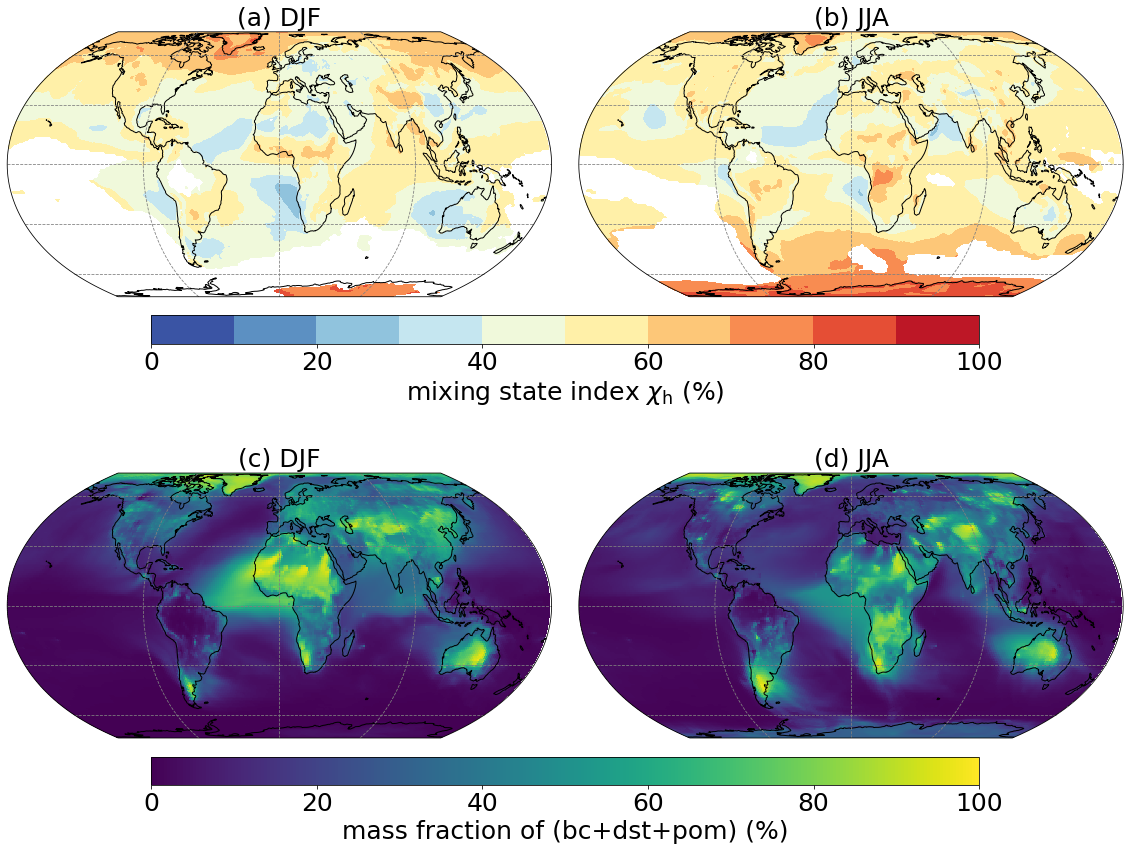

In [4]:
ds = xr.open_dataset("../nc_files/f09_mask.nc")
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))
ds=ds.rename_dims({'lon': 'longitude','lat': 'latitude'}).rename({'lon': 'longitude','lat': 'latitude'})
lons=np.asarray(ds.longitude)
lats=np.asarray(ds.latitude)
xx, yy = np.meshgrid(lons, lats)

DJF=np.asarray(ds["chi_hyg"].sel(season="DJF"))
JJA=np.asarray(ds["chi_hyg"].sel(season="JJA"))
DJF_per = np.asarray(ds["hyg_per"].sel(season="DJF")*100)
JJA_per = np.asarray(ds["hyg_per"].sel(season="JJA")*100)

rc={'axes.labelsize':25, 'font.size':25 , 'legend.fontsize':25, 'axes.titlesize':25}
plt.rcParams.update(**rc)


crs = ccrs.EqualEarth()
projection =ccrs.PlateCarree()
levels = [0,10,20,30,40,50,60,70,80,90,100]

fig = plt.figure(figsize=(20, 13))
spec2 = matplotlib.gridspec.GridSpec(ncols=2, nrows=2, figure=fig,
                                     wspace=.05, hspace=.1,
                                     bottom=.05, top=.95)

axes = []
f0 = fig.add_subplot(spec2[0, 0],projection=crs)
f1 = fig.add_subplot(spec2[0, 1],projection=crs)
axes.append([f0,f1])

f0 = fig.add_subplot(spec2[1, 0],projection=crs)
f1 = fig.add_subplot(spec2[1, 1],projection=crs)
axes.append([f0,f1])

################ first row ################ 
ax= plt.subplot(axes[0][0],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(a) DJF')
p0 = ax.contourf(xx, yy, DJF,
                 vmin=0,vmax=100,
                 transform=projection,
                 levels=levels,
                 cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

ax= plt.subplot(axes[0][1],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(b) JJA')
p1 = ax.contourf(xx, yy, JJA,
                 vmin=0,vmax=100,
                 transform=projection,
                 levels=levels,
                 cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

################ second row ################ 
ax= plt.subplot(axes[1][0],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(c) DJF')
p2 = ax.pcolormesh(xx, yy, DJF_per,
                 vmin=0,vmax=100,
                 transform=projection,rasterized=True)
                 #cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])

ax= plt.subplot(axes[1][1],projection=crs)
ax.set_global() 
ax.coastlines()
ax.set_title('(d) JJA')
p3 = ax.pcolormesh(xx, yy, JJA_per,
                 vmin=0,vmax=100,
                 transform=projection,rasterized=True)
                 #cmap='RdYlBu_r')
gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
gl.xlocator = mticker.FixedLocator([-90, 0, 90])
    
    
pos2 = axes[0][1].get_position()
pos1 = axes[0][0].get_position()
cbar_ax = fig.add_axes([pos1.x0+0.1,pos1.y0-.05,
                        pos2.x1-pos1.x0-0.2,.03])
cbar_ax.xaxis.set_label_position('bottom')
cbar = fig.colorbar(p1,cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel(r'mixing state index $\chi_{\rm{h}}$ (%)')


pos2 = axes[1][1].get_position()
pos1 = axes[1][0].get_position()
cbar_ax = fig.add_axes([pos1.x0+0.1,pos1.y0-.05,
                        pos2.x1-pos1.x0-0.2,.03])
cbar_ax.xaxis.set_label_position('bottom')
cbar = fig.colorbar(p3,cax=cbar_ax,orientation='horizontal')
cbar.ax.set_xlabel(r'mass fraction of (bc+dst+pom) (%)')

plt.savefig('../../figures/chi_hyg.pdf',dpi=666)

plt.show()

## Figure S1 (mixing ratio)

In [5]:
ds_mass = xr.open_dataset("../nc_files/f09.nc")
ds_mass=ds_mass.assign_coords(lon=(((ds_mass.lon + 180) % 360) - 180))
ds_mass=ds_mass.reindex(lon=sorted(ds_mass.lon))
ds_mass=ds_mass.rename_dims({'lon': 'longitude','lat': 'latitude'}).rename({'lon': 'longitude','lat': 'latitude'})

var_name = []
var_list = []
char_list = 'abcdefghijkl'
for var in ["bc", "pom",
            "dst","soa", 
            "ncl","so4"]:
    for var_season in ["DJF","JJA"]:
        var_list.append(ds_mass["Mass_"+var].sel(season=var_season)*10**9)
        var_name.append(var+":"+var_season)

/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


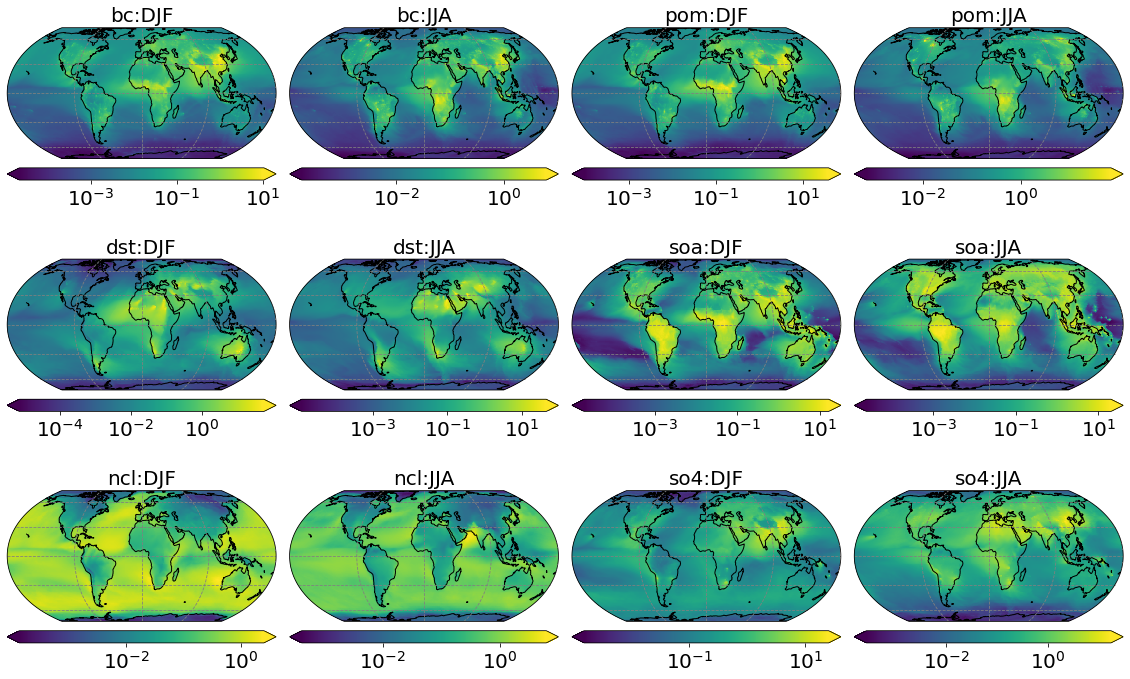

In [6]:
rc={'axes.labelsize':20, 'font.size':20, 'legend.fontsize':20, 'axes.titlesize':20}
plt.rcParams.update(**rc)

crs = ccrs.EqualEarth()
levels = [0,10,20,30,40,50,60,70,80,90,100]

fig = plt.figure(figsize=(20, 10))
spec2 = matplotlib.gridspec.GridSpec(ncols=4, nrows=3, figure=fig,
                                     wspace=.05, hspace=.25,
                                     bottom=.05, top=.95)
axes = []
f0 = fig.add_subplot(spec2[0, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[0, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[0, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[0, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])

f0 = fig.add_subplot(spec2[1, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[1, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[1, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[1, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])

f0 = fig.add_subplot(spec2[2, 0],projection=ccrs.EqualEarth())
f1 = fig.add_subplot(spec2[2, 1],projection=ccrs.EqualEarth())
f2 = fig.add_subplot(spec2[2, 2],projection=ccrs.EqualEarth())
f3 = fig.add_subplot(spec2[2, 3],projection=ccrs.EqualEarth())
axes.append([f0,f1,f2,f3])


for i in range(12):
    ax = plt.subplot(spec2[i],projection=crs)
    
    ax.coastlines()
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    #ax.set_title("("+char_list[i]+")")
    ax.set_title(var_name[i])

    zz = var_list[i]
    p = ax.pcolormesh(xx, yy, zz,
                      norm=colors.LogNorm(vmin=zz.min(), vmax=zz.max()),
                      transform=projection)
                      #cmap='RdBu')
    gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
    gl.xlocator = mticker.FixedLocator([-90, 0, 90])
    
    plt.colorbar(p,orientation='horizontal',fraction=0.07,pad=0.05,extend='both')
    
    
        
plt.tight_layout()
fig.savefig('../../figures/species_dist.png')
plt.show()

## Figure S2 (percentage)

In [7]:
ds = xr.open_dataset("../nc_files/f09_mask.nc")
ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
ds=ds.reindex(lon=sorted(ds.lon))
ds=ds.rename_dims({'lon': 'longitude','lat': 'latitude'}).rename({'lon': 'longitude','lat': 'latitude'})
lons=np.asarray(ds.longitude)
lats=np.asarray(ds.latitude)
xx, yy = np.meshgrid(lons, lats)

In [8]:
var_name = []
var_list = []
char_list = 'abcdefghijkl'
for var in ["bc", "pom",
            "dst","soa", 
            "ncl","so4"]:
    for var_season in ["DJF","JJA"]:
        var_list.append(np.asarray(ds[var+"_per"].sel(season=var_season)))
        var_name.append(var+":"+var_season)

/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar
/data/keeling/a/zzheng25/miniconda3/envs/partmc/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


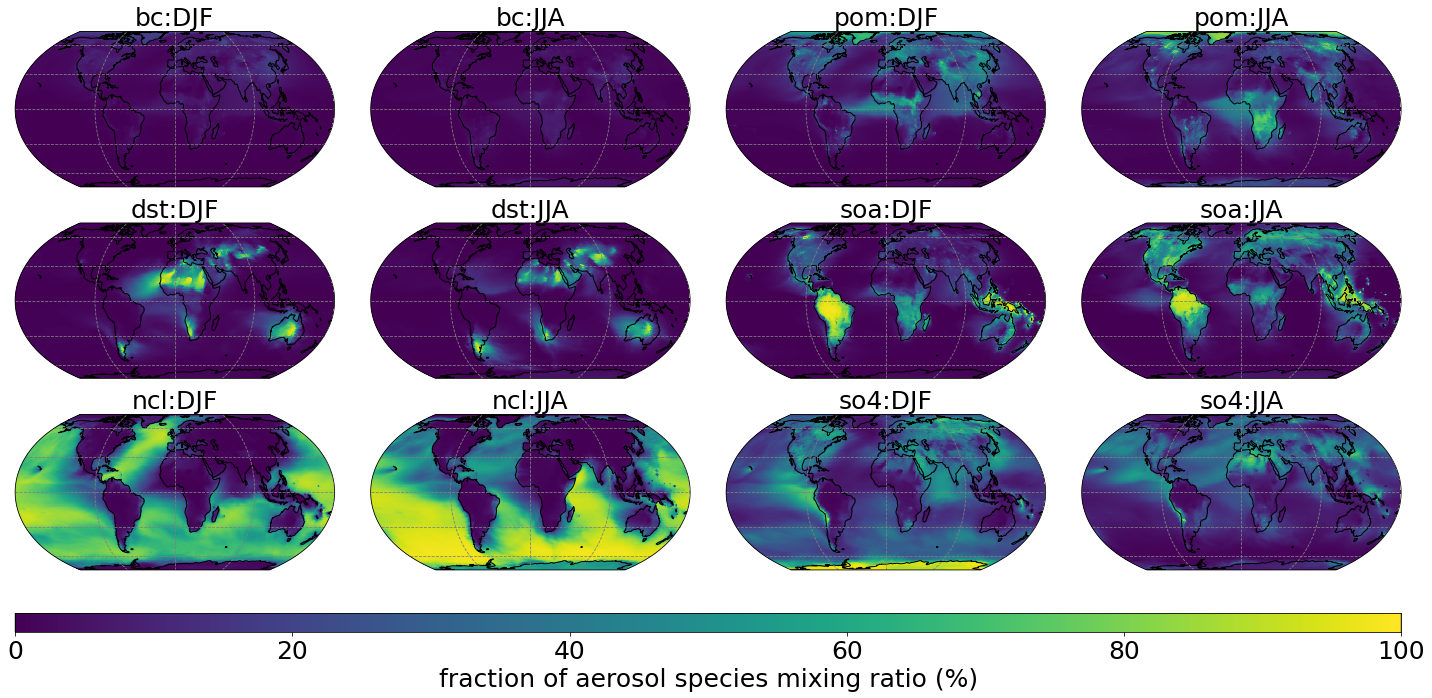

In [9]:
rc={'axes.labelsize':25, 'font.size':25, 'legend.fontsize':25, 'axes.titlesize':25}
plt.rcParams.update(**rc)

projection = ccrs.PlateCarree()
axes_class = (GeoAxes,
              dict(map_projection=ccrs.EqualEarth()))

fig = plt.figure(figsize=(20,10))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(3, 4),
                axes_pad=0.5,
                cbar_location='bottom',
                cbar_mode='single',
                cbar_pad=0.1,
                cbar_size='3%',
                label_mode='')  # note the empty label_mode


for i, ax in enumerate(axgr):
    ax.coastlines()
    #ax.set_title("("+char_list[i]+")")
    ax.set_title(var_name[i])

    p = ax.pcolormesh(xx, yy, var_list[i]*100,
                      vmin=0,vmax=100,
                      transform=projection)#,
                      #cmap='RdBu')
    gl=ax.gridlines(color='grey', linestyle='--', draw_labels=False)
    gl.xlocator = mticker.FixedLocator([-90, 0, 90])

cbar=axgr.cbar_axes[0].colorbar(p)
cbar.ax.set_xlabel(r'fraction of aerosol species mixing ratio (%)')
plt.tight_layout()

plt.savefig('../../figures/species_dist_per.png')

plt.show()